In [1]:
# import the packages that needed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import tensorflow as tf
import keras #what we need for deep learning
import matplotlib.pyplot as plt #for visualization convenience

Using TensorFlow backend.


In [2]:
# go to the file folders 
train_dir = '2/'
train_folders = os.listdir(train_dir)
# test_dir = '../input/asl_alphabet_test/asl_alphabet_test/'
# test_files = os.listdir(test_dir)
print(train_folders)

['Y', 'R', 'space', 'N', 'del', 'I', 'W', 'D', 'H', 'P', 'O', 'L', 'Z', 'B', 'A', 'M', 'K', 'G', 'U', 'F', 'X', 'V', 'T', 'C', 'Q', 'J', 'nothing', 'S', 'E']


In [3]:
# import packages cv
import cv2
x, y = [], []
# read each image in each folder and collect them into a matrix
for folder in train_folders:
    files = os.listdir(train_dir + folder)
    #print(train_dir + folder)
    print('Reading images from ' + train_dir + folder + '/ ...')
    for file in files[:1000]:
        img = cv2.imread(train_dir + folder + '/' + file)
        img = cv2.resize(img, (227, 227)) # resize the images to have better performance in model
        #img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        x.append(img) # collect the matrix for data
        y.append(folder) #collect the matrix for labels

Reading images from 2/Y/ ...
Reading images from 2/R/ ...
Reading images from 2/space/ ...
Reading images from 2/N/ ...
Reading images from 2/del/ ...
Reading images from 2/I/ ...
Reading images from 2/W/ ...
Reading images from 2/D/ ...
Reading images from 2/H/ ...
Reading images from 2/P/ ...
Reading images from 2/O/ ...
Reading images from 2/L/ ...
Reading images from 2/Z/ ...
Reading images from 2/B/ ...
Reading images from 2/A/ ...
Reading images from 2/M/ ...
Reading images from 2/K/ ...
Reading images from 2/G/ ...
Reading images from 2/U/ ...
Reading images from 2/F/ ...
Reading images from 2/X/ ...
Reading images from 2/V/ ...
Reading images from 2/T/ ...
Reading images from 2/C/ ...
Reading images from 2/Q/ ...
Reading images from 2/J/ ...
Reading images from 2/nothing/ ...
Reading images from 2/S/ ...
Reading images from 2/E/ ...


In [4]:
# display the shape of the data and labels
#x = cv2.resize(x,[800,227,227,1])
print(len(x),x[0].shape)
print(len(y))

29000 (227, 227, 3)
29000


In [5]:
# encode the label into digital numbers
from sklearn.preprocessing import LabelEncoder
encode_y = LabelEncoder().fit_transform(y)
print(encode_y.shape)

(29000,)


In [6]:
# Visualization
def next_batch(batch_size, data, labels):
    idx = np.arange(0, len(data))
    np.random.shuffle(idx) 
    idx = idx[: batch_size]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [7]:
# display the images for each batch
def display_images(data, title, display_label = True):
    x, y = data
    fig, axes = plt.subplots(2, 6, figsize = (18, 5))
    fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
    fig.suptitle(title, fontsize = 18)
    for i, ax in enumerate(axes.flat):
        ax.imshow(x[i])
        if display_label:
            ax.set_xlabel(y[i])
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

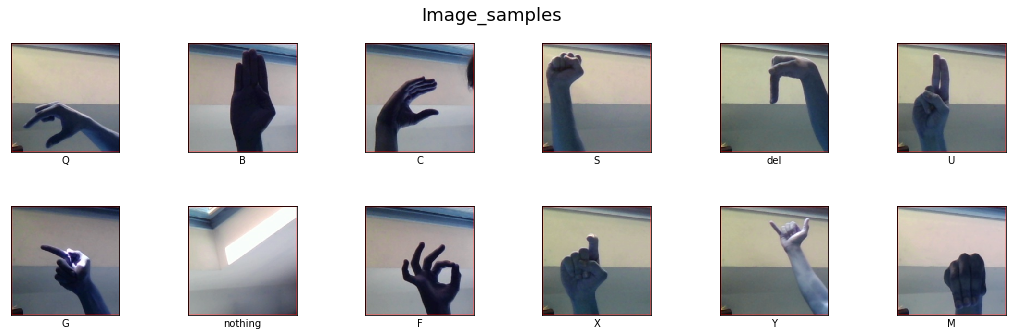

In [8]:
#display the Image samples
display_images(next_batch(12,x, y), 'Image_samples')

In [9]:
X = np.array(x)
#X = np.expand_dims(X,axis=3)
print(X.shape)

#import to_categorical
#Converts a class vector (integers) to binary class matrix
from keras.utils import to_categorical
Y = to_categorical(encode_y)
print(print(Y.shape))
#print(Y[4299])
#cv2.imwrite('img.jpg',X[4299])

(29000, 227, 227, 3)
(29000, 29)
None


In [10]:
# import train_test_split
# randomly split input dataset as train set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size=0.2, random_state=42)
print(x_train.shape)

(23200, 227, 227, 3)


In [11]:
# transfer data into float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalization
x_train /= 255.0
x_test /= 255.0
print(y_train[200])
cv2.imwrite('pic.jpg',x_train[200]*255)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


True

In [12]:
print(y_train[500])
# Loads an image from a file 
cv2.imwrite('pic.jpg',x_train[500]*255)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


True

In [13]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)
print('y_train shape:', y_train.shape)

x_train shape: (23200, 227, 227, 3)
x_test shape: (5800, 227, 227, 3)
y_test shape: (5800, 29)
y_train shape: (23200, 29)


In [14]:
# import tools to build model
from keras.models import Sequential  
from keras.layers import Dense,Flatten,Dropout    
from keras.layers.convolutional import Conv2D,MaxPooling2D   

# Build Alextnet CNN model with modified parameters
# Maxpooling2D could help to improve precision and avoid from overfitting
# ReLU is aimed to imporve training speed
# Dropout is a method to avoid from overfitting as well
model = Sequential()  
model.add(Conv2D(96,(11,11),strides=(4,4),input_shape=(227,227,3),padding='valid',
                 activation='relu',kernel_initializer='uniform'))  
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))  
model.add(Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu',
                 kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))  
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',
                 kernel_initializer='uniform'))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',
                 kernel_initializer='uniform')) 
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',
                 kernel_initializer='uniform')) 
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))  
model.add(Flatten())  
model.add(Dense(4096,activation='relu',name='Dense_1'))  
model.add(Dropout(0.5))  
model.add(Dense(4096,activation='relu',name='Dense_2'))  
model.add(Dropout(0.5))  
model.add(Dense(29,activation='softmax',name='Dense_3'))  

In [15]:
# define LossHistory class
# plot loss
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure(figsize=(8,8))
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        #plt.convert('RGB')
        plt.savefig('epoch_1d.png')
        #plt.show()

In [16]:
# import optimizer
# set the corresponding parameters for model compile
from keras import optimizers
batch_size = 256
epochs = 15
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
history = LossHistory()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test,y_test),
          callbacks=[history])
# import json as data exchange method
json_string = model.to_json()
# save trained model in json
open('my_model_architecture.json','w').write(json_string)  
# save weights of model to designed location
model.save_weights('my_model_weights.h5')

Train on 23200 samples, validate on 5800 samples
Epoch 1/15
23200/23200 [==============================] - 75s 3ms/step - loss: 2.9006 - acc: 0.1518 - val_loss: 1.5873 - val_acc: 0.4786
Epoch 2/15
23200/23200 [==============================] - 65s 3ms/step - loss: 1.0166 - acc: 0.6642 - val_loss: 0.2009 - val_acc: 0.9379
Epoch 3/15
23200/23200 [==============================] - 65s 3ms/step - loss: 0.1758 - acc: 0.9403 - val_loss: 0.0377 - val_acc: 0.9890
Epoch 4/15
23200/23200 [==============================] - 65s 3ms/step - loss: 0.0564 - acc: 0.9807 - val_loss: 0.0089 - val_acc: 0.9983
Epoch 5/15
23200/23200 [==============================] - 65s 3ms/step - loss: 0.0302 - acc: 0.9904 - val_loss: 0.0127 - val_acc: 0.9953
Epoch 6/15
23200/23200 [==============================] - 65s 3ms/step - loss: 0.0171 - acc: 0.9947 - val_loss: 0.0032 - val_acc: 0.9998
Epoch 7/15
23200/23200 [==============================] - 65s 3ms/step - loss: 0.0146 - acc: 0.9957 - val_loss: 0.0013 - val_acc:

The result above shows training time, loss, accuracy for each epoch. 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 256)       884992    
__________

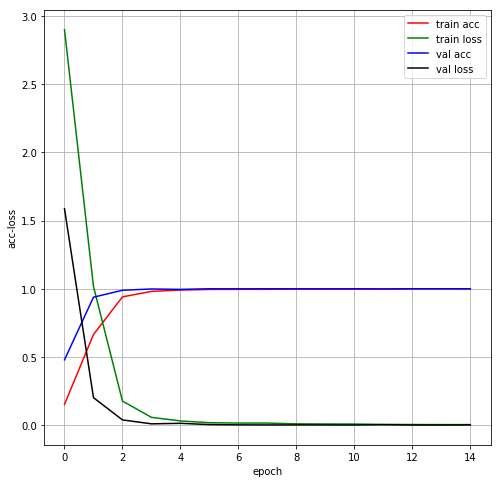

In [17]:
# import plot_model
# visualization
from keras.utils.vis_utils import plot_model
# plot_model(model, to_file='model_1d.png') 
history.loss_plot('epoch')
model.summary()

In [4]:
# predict with model above
y_pred=(model.predict(x_test))
print((5800, 29))

(5800, 29)


In [27]:
# get predicition matrix
yyy = np.argmax(y_pred,axis = 1)
print(yyy)
print(y_test)

[28 25 23 ... 20 28 26]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]]


In [32]:
# import confusion_matrix
# compute confusion matrix to evaluate the accuracy of a classification
from sklearn.metrics import confusion_matrix
data_y = [np.argmax(y_test)for y_test in y_test]
conf_mat = confusion_matrix(data_y, yyy)
print(conf_mat)


[[223   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0 201   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 192   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 198   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 197   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 191   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 194   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 207   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   

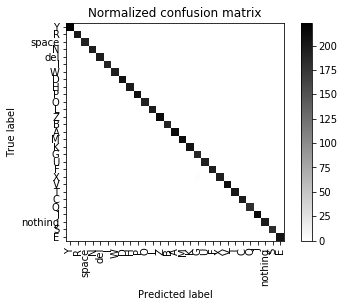

In [34]:
# creat label of input
labels = ['Y', 'R', 'space', 'N', 'del', 'I', 'W', 'D', 'H', 'P', 'O', 'L', 'Z', 'B', 'A', 'M', 'K', 'G', 'U', 'F', 'X', 'V', 'T', 'C', 'Q', 'J', 'nothing', 'S', 'E']
# plot confusion matrix to show accuracy
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.binary):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(conf_mat, title='Normalized confusion matrix')

From the graph above, it is obviously that we could pass the test of original dataset with 100% accuracy. Furthermore, we try to test the model with new photograph following the ASL-alphabet.